# Simple Regression

This is a simple exercise on neural network for regression questions, which is the very important task in classic machine learning.
So, in this exercise we want you to fit the 1-dim data based on neural network method (The data is low dim so the model is not deep). You should be able to get a good fitting curve, then plot the fitting curve. 

The code below is the loading part of the data and the model definition. Please complete the training part and the plotting part.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from torch.optim import SGD

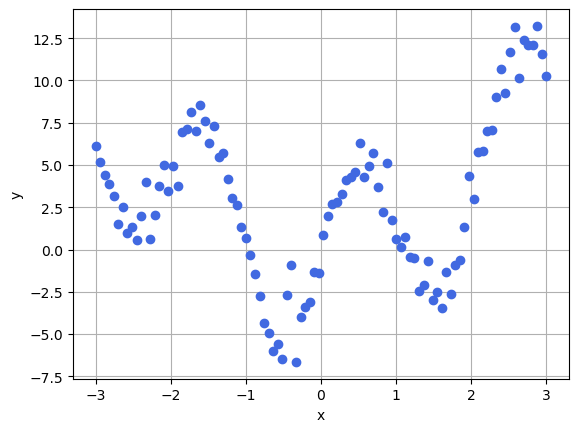

In [10]:
x = torch.linspace(-3, 3, 100).unsqueeze(1)
y = x ** 2 + 5 * torch.sin(3 * x) + torch.randn(x.size())

plt.plot(x.numpy(), y.numpy(), 'o', color="royalblue")
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

In [ ]:
linear = LinearRegression()

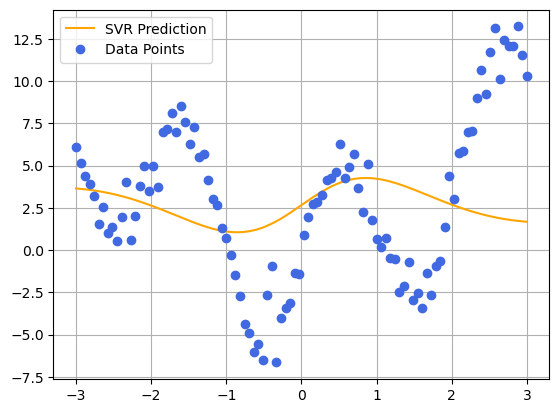

In [32]:
svm = SVR(kernel='sigmoid')
svm.fit(x.numpy(), y.numpy().ravel())

x_test = torch.linspace(-3, 3, 200).unsqueeze(1)
y_svm = svm.predict(x_test.numpy())
plt.plot(x_test.numpy(), y_svm, color="orange", label="SVR Prediction")
plt.plot(x.numpy(), y.numpy(), 'o', color="royalblue", label="Data Points")
plt.grid()
plt.legend()
plt.show()

In [37]:
class Network(nn.Module):
    def __init__(self, input_dim: int, hidden_dim: int, output_dim: int) -> None:
        super(Network, self).__init__()
        self.linear1 = nn.Linear(input_dim, hidden_dim)
        self.activation = nn.ReLU()
        self.linear2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.linear1(x)
        x = self.activation(x)
        return self.linear2(x)
    
model = Network(input_dim=1, hidden_dim=64, output_dim=1)
model

Network(
  (linear1): Linear(in_features=1, out_features=64, bias=True)
  (activation): ReLU()
  (linear2): Linear(in_features=64, out_features=1, bias=True)
)

In [ ]:
# Now please training the neural network model and plot the regression results.